## Problem Statement : Loan Approval Prediction Problem
#### Type: Binaray Classification Loan approval prediction is classic problem to lean and apply lots of 
#### data analysis techniques to creat best classification model.

#### Given with the dataset consisting of details  of applicants for loan and status whether the loan application is approved or not.
#### Basis on the a binary classification model is to be created with maximum accuracy.

In [1]:
### find out is there is loan approved or not (loan_status is dependent variable)

In [2]:
### step:1  Import the packages numpy, pandas,matplotlib,seaborn,sklearn,train test split,metrics

In [3]:
### step 2: Load the Dataset

In [4]:
### step 3: Explore the data-shape, visualisation

In [5]:
### step 4: X,y-->train data test data--> Fit the model with training data predict with the test data

In [6]:
#Basic and most important librareis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#clasifieres
from sklearn.ensemble  import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

#Model evaluation tools
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score

#Data processing functions
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [7]:
df=pd.read_csv('loan_prediction.csv')

In [8]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [9]:
df.shape

(614, 13)

In [10]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

## data visualization

<Axes: xlabel='Gender', ylabel='count'>

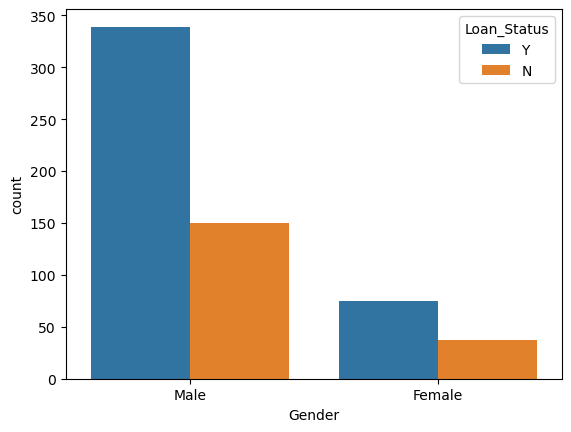

In [11]:
sns.countplot(x='Gender',hue='Loan_Status',data=df)

<Axes: xlabel='Married', ylabel='count'>

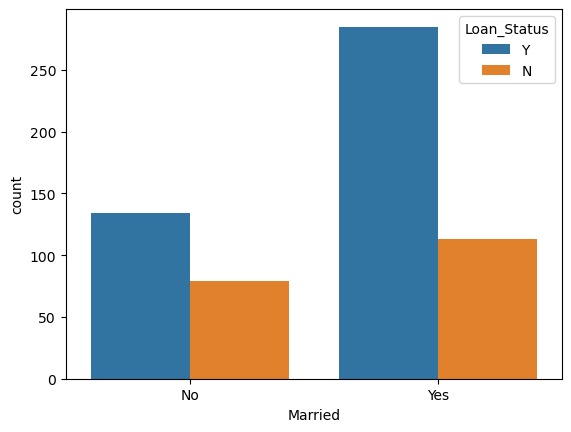

In [12]:
sns.countplot(x='Married',hue='Loan_Status',data=df)

In [13]:
correlation_mat = df.corr()

<Axes: >

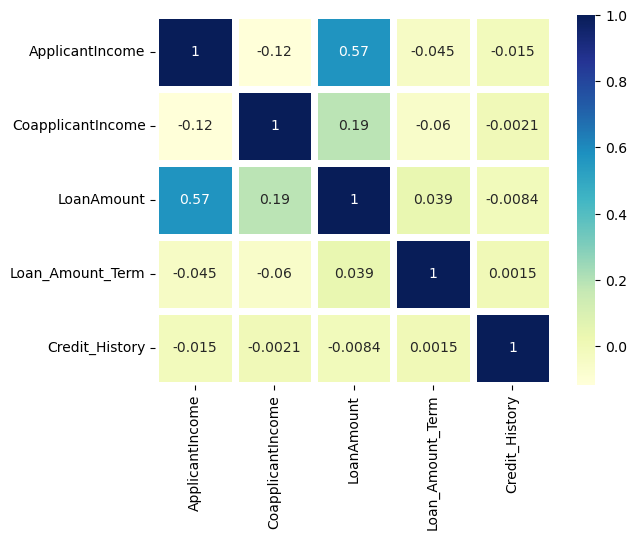

In [14]:
sns.heatmap(correlation_mat,annot=True,linewidths=5,cmap='YlGnBu')

## there is positive correlation between Applicacantincome and LoanAmount, CoapplicantIncome and LoanAmount.

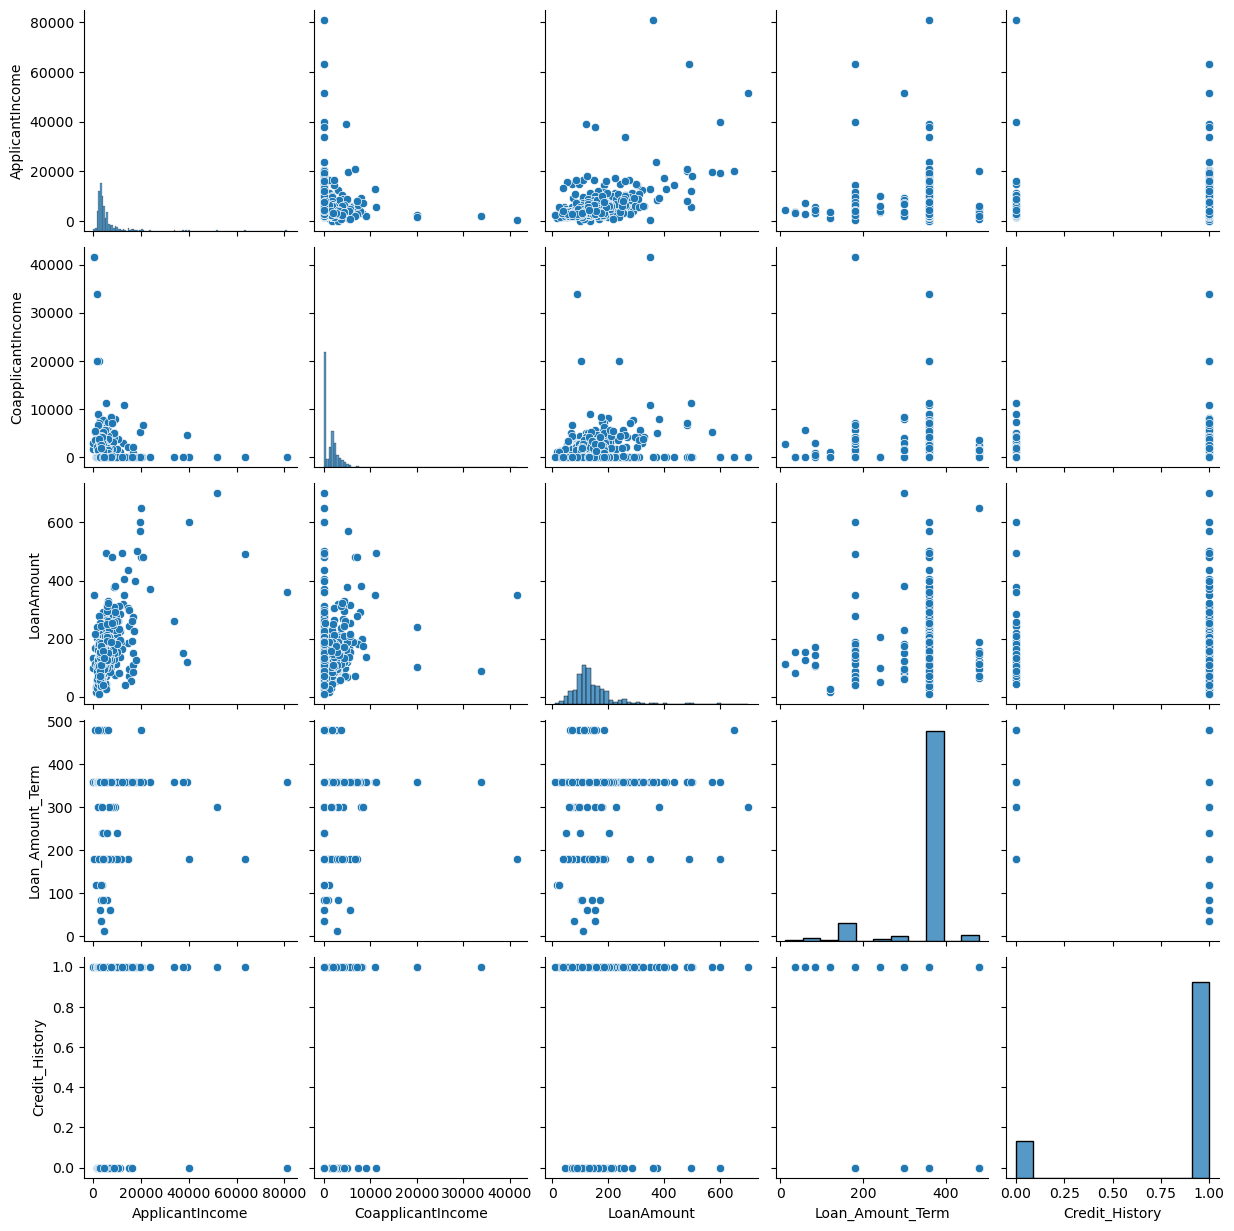

In [15]:
sns.pairplot(df)
plt.show()

In [16]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [18]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<Axes: >

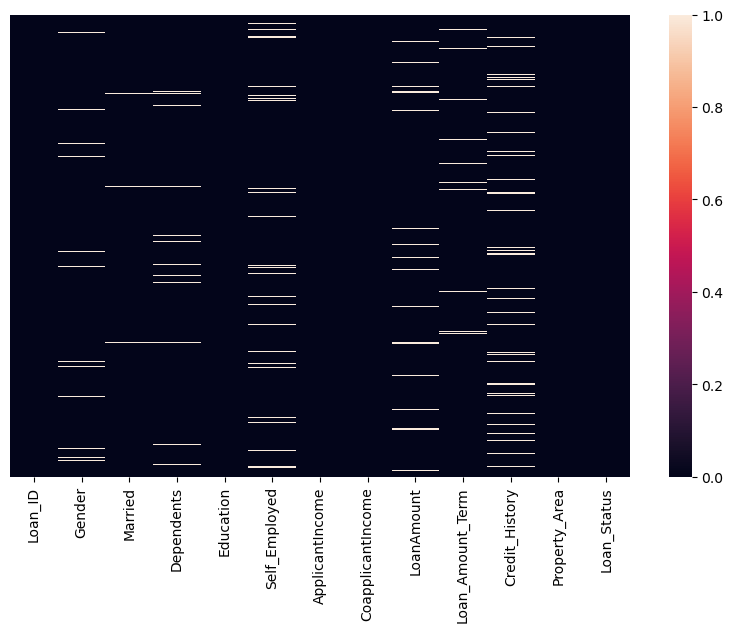

In [19]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(),yticklabels=False)

## Prepare data for medel training i.e: removing outliers,filling null values

In [20]:
print(df['Gender'].value_counts())
print(df['Married'].value_counts())
print(df['Self_Employed'].value_counts())
print(df['Dependents'].value_counts())
print(df['Credit_History'].value_counts())
print(df['Loan_Amount_Term'].value_counts())

Male      489
Female    112
Name: Gender, dtype: int64
Yes    398
No     213
Name: Married, dtype: int64
No     500
Yes     82
Name: Self_Employed, dtype: int64
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64
1.0    475
0.0     89
Name: Credit_History, dtype: int64
360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64


Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


<Axes: >

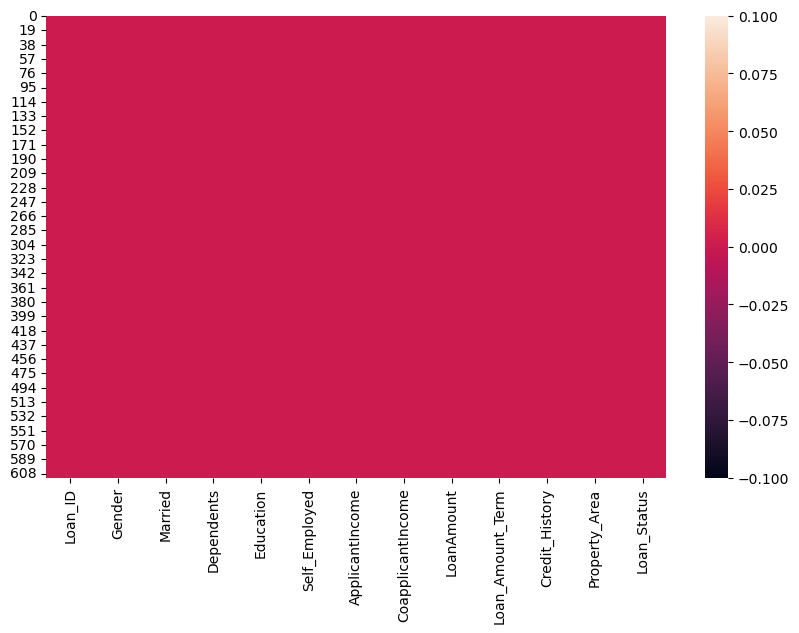

In [21]:
# Filling all Nan values with mode of respective variable
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)
df['Married'].fillna(df['Married'].mode()[0],inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0],inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace=True)


# All values of "Dependent" columns were of "str" from now converting to "int" form.
df['Dependents']=df['Dependents'].replace('3+',int(3))
df['Dependents']=df['Dependents'].replace('1',int(1))
df['Dependents']=df['Dependents'].replace('2',int(2))
df['Dependents']=df['Dependents'].replace('0',int(0))

df['LoanAmount'].fillna(df['LoanAmount'].median(),inplace=True)

print(df.isnull().sum())

# Heatmap for null values
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull())

In [22]:
df.head().T

,0,1,2,3,4
Loan_ID,LP001002,LP001003,LP001005,LP001006,LP001008
Gender,Male,Male,Male,Male,Male
Married,No,Yes,Yes,Yes,No
Dependents,0,1,0,0,0
Education,Graduate,Graduate,Graduate,Not Graduate,Graduate
Self_Employed,No,No,Yes,No,No
ApplicantIncome,5849,4583,3000,2583,6000
CoapplicantIncome,0.0,1508.0,0.0,2358.0,0.0
LoanAmount,128.0,128.0,66.0,120.0,141.0
Loan_Amount_Term,360.0,360.0,360.0,360.0,360.0


# Encoding (labeled encoding)

In [23]:
# labeled encoding techique (change catagorical(male,female) value to numerical value(1,0))
df['Gender']=le.fit_transform(df['Gender'])
df['Married']=le.fit_transform(df['Married'])
df['Education']=le.fit_transform(df['Education'])
df['Self_Employed']=le.fit_transform(df['Self_Employed'])
df['Property_Area']=le.fit_transform(df['Property_Area'])
df['Loan_Status']=le.fit_transform(df['Loan_Status'])

#data= pd.get_dummies(data)
df.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


### Fitting the Model

In [24]:
# Dividing data into Input X variable and Target Y varaible

X = df.drop(['Loan_Status','Loan_ID'],axis=1)
y = df['Loan_Status']

In [52]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [53]:
model1=LogisticRegression(solver='liblinear')

In [54]:
model1.fit(X_train,y_train)

LogisticRegression(solver='liblinear')

In [55]:
model1.score(X_train,y_train)

0.8018648018648019

In [56]:
model1.score(X_test,y_test)

0.8324324324324325

## Decision Tree

In [30]:
dtree=DecisionTreeClassifier(criterion='gini')
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [31]:
dtree.score(X_train,y_train)

1.0

In [32]:
dtree.score(X_test,y_test)

0.7567567567567568

In [57]:
dTreeR = DecisionTreeClassifier(criterion='gini', max_depth= 3,  random_state=0)
dTreeR.fit(X_train,y_train)
print(dTreeR.score(X_train,y_train))

0.8181818181818182


In [58]:
y_predict = dTreeR.predict(X_test)

In [59]:
print(dTreeR.score(X_test,y_test))

0.8108108108108109


In [60]:
from sklearn import metrics

<Axes: >

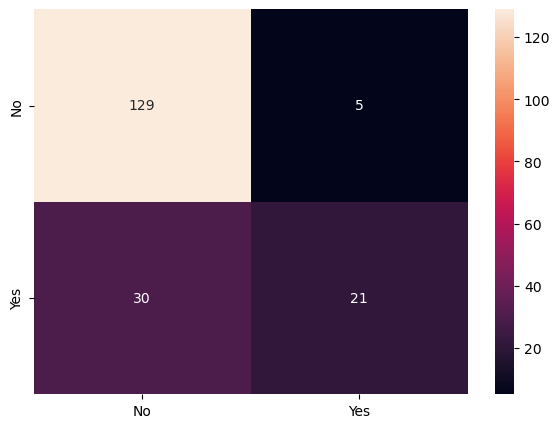

In [61]:
cm=metrics.confusion_matrix(y_test,y_predict,labels=[1,0])

df_cm=pd.DataFrame(cm,index=[i for i in ['No','Yes']],
                  columns=[i for i in['No','Yes']])
plt.figure(figsize= (7,5))
sns.heatmap(df_cm,annot=True,fmt='g')

## Bagging classifier

In [62]:
from sklearn.ensemble import BaggingClassifier
bgcl = BaggingClassifier(n_estimators=150,base_estimator=dTreeR,random_state=None)
bgcl = bgcl.fit(X_train,y_train)
y_predict = bgcl.predict(X_test)
print(bgcl.score(X_test,y_test))

0.827027027027027


<Axes: >

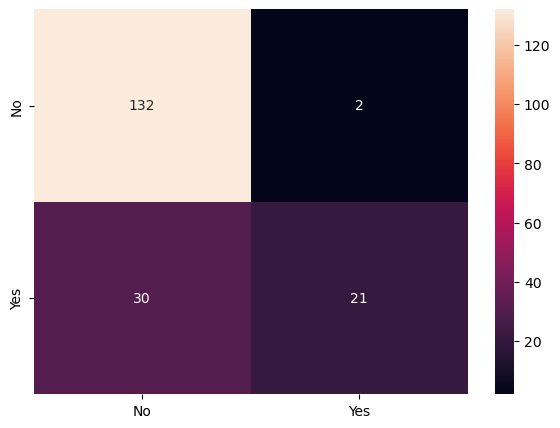

In [63]:
from sklearn import metrics

cm=metrics.confusion_matrix(y_test,y_predict,labels=[1,0])

df_cm=pd.DataFrame(cm,index=[i for i in ['No','Yes']],
                  columns=[i for i in['No','Yes']])
plt.figure(figsize= (7,5))
sns.heatmap(df_cm,annot=True,fmt='g')

## Ada Boost Model

In [64]:
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier(n_estimators=150,random_state=0)
abcl = abcl.fit(X_train,y_train)
y_predict = abcl.predict(X_test)
print(abcl.score(X_test,y_test))

0.8162162162162162


<Axes: >

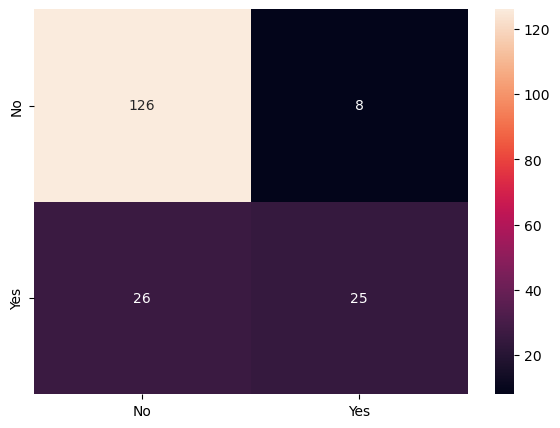

In [65]:
cm=metrics.confusion_matrix(y_test,y_predict,labels=[1,0])

df_cm=pd.DataFrame(cm,index=[i for i in ['No','Yes']],
                  columns=[i for i in['No','Yes']])
plt.figure(figsize= (7,5))
sns.heatmap(df_cm,annot=True,fmt='g')

## Gradient Boost Model

In [66]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators=200,random_state=0)
gbcl = gbcl.fit(X_train,y_train)
y_predict = gbcl.predict(X_test)
print(gbcl.score(X_test,y_test))

0.8108108108108109


<Axes: >

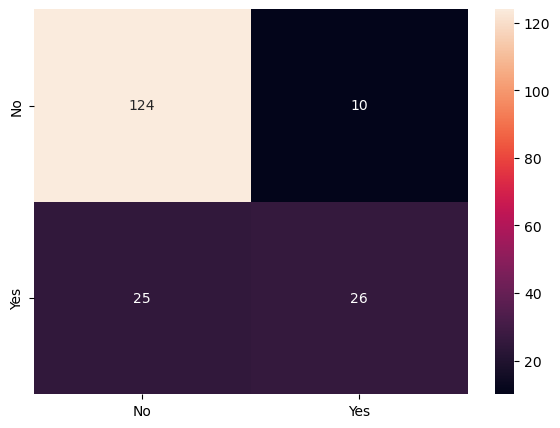

In [67]:
cm=metrics.confusion_matrix(y_test,y_predict,labels=[1,0])

df_cm=pd.DataFrame(cm,index=[i for i in ['No','Yes']],
                  columns=[i for i in['No','Yes']])
plt.figure(figsize= (7,5))
sns.heatmap(df_cm,annot=True,fmt='g')